## Dataset loading using braindecode

In [1]:
import braindecode

<frozen importlib._bootstrap>:219: FutureWarning: mne.io.pick.pick_types is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
<frozen importlib._bootstrap>:219: FutureWarning: mne.io.pick.pick_channels_regexp is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
<frozen importlib._bootstrap>:219: FutureWarning: mne.io.pick.channel_type is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
c:\Users\Sam\miniconda3\envs\pytgpu\lib\site-packages\moabb\pipelines\__init__.py:26: ModuleNotFoundError: Tensorflow is not installed. You won't be able to use these MOABB pipelines if you attempt to do so.
  warn(


In [2]:
import torch
from braindecode.models import EEGNetv4, EEGConformer, ATCNet, EEGITNet, EEGInception
from braindecode.datasets import MOABBDataset

In [3]:
raw_dataset = MOABBDataset(dataset_name="BNCI2014_001", subject_ids=None)

Preprocess dataset using braindecode API

In [4]:
from braindecode.preprocessing import create_windows_from_events
from braindecode.preprocessing import exponential_moving_standardize, preprocess, Preprocessor

In [5]:
# low_freq = 4
# high_freq = 38
# resample_freq = 250

# # preprocess data using "braindecode.preprocessor"
# # only use eeg(stim channels must be removed)
# preprocessors = [Preprocessor('pick', picks=['eeg'])]

# # if pick_channels:
# #     preprocessors.append(Preprocessor('pick', picks=pick_channels))
# # preprocessors.append(Preprocessor(lambda data: multiply(data, 1e6)))


# # if low_freq or high_freq:
#     # preprocessors.append(Preprocessor('filter', l_freq=low_freq, h_freq=high_freq))
# if resample_freq:
#     preprocessors.append(Preprocessor('resample', sfreq=resample_freq))
# preprocessors.append(Preprocessor(exponential_moving_standardize, factor_new=1e-3))
# preprocess(raw_dataset, preprocessors)

# from braindecode.preprocessing import MNEPreproc, NumpyPreproc, preprocess

low_cut_hz = 4.  # low cut frequency for filtering
high_cut_hz = 38.  # high cut frequency for filtering
# Parameters for exponential moving standardization
factor_new = 1e-3
init_block_size = 1000

preprocessors = [
    # keep only EEG sensors
    Preprocessor(fn='pick_types', eeg=True, meg=False, stim=False),
    # convert from volt to microvolt, directly modifying the numpy array
    Preprocessor(fn=lambda x: x * 1e6),
    # bandpass filter
    Preprocessor(fn='filter', l_freq=low_cut_hz, h_freq=high_cut_hz),
    # exponential moving standardization
    Preprocessor(fn=exponential_moving_standardize, factor_new=factor_new,
        init_block_size=init_block_size)
]

# Preprocess the data
preprocess(raw_dataset, preprocessors)

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



c:\Users\Sam\miniconda3\envs\pytgpu\lib\site-packages\braindecode\preprocessing\preprocess.py:55: UserWarning: Preprocessing choices with lambda functions cannot be saved.
  warn('Preprocessing choices with lambda functions cannot be saved.')
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple an

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple an

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple an

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple an

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple an

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple an

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple an

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple an

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Filter length: 413 samples (1.652 s)

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple an

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s



NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple an

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple an

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple an

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple an

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s



NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple an

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple an

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple an

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Window Split (for each trail start and end)

In [6]:
start_offset = -0.5
stop_offset = 0

sfreq = raw_dataset.datasets[0].raw.info['sfreq']
#assert all([ds.raw.info['sfreq'] == sfreq for ds in raw_dataset.datasets])
trial_start_offset_samples = int(start_offset * sfreq)
trial_stop_offset_samples = int(stop_offset * sfreq)

windows_dataset = create_windows_from_events(
    raw_dataset,
    trial_start_offset_samples,
    trial_stop_offset_samples,
    preload=True,
)

Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']

In [7]:
import pandas as pd
meta = pd.DataFrame(windows_dataset.get_metadata())
meta.to_csv('windows_dataset.csv')
meta

,i_window_in_trial,i_start_in_trial,i_stop_in_trial,target,subject,session,run
0,0,125,1250,3,1,0train,0
1,0,2128,3253,0,1,0train,0
2,0,4046,5171,2,1,0train,0
3,0,5998,7123,1,1,0train,0
4,0,8006,9131,1,1,0train,0
...,...,...,...,...,...,...,...
43,0,86625,87750,0,9,1test,5
44,0,88531,89656,3,9,1test,5
45,0,90459,91584,0,9,1test,5
46,0,92573,93698,1,9,1test,5


In [8]:
sess_list = meta['session'].tolist()

In [9]:
import numpy as np

In [10]:
np.unique(meta['session'], return_counts = True)

(array(['0train', '1test'], dtype=object), array([2592, 2592], dtype=int64))

Get additional dataset details and set model configuration

In [11]:
n_channels = raw_dataset[0][0].shape[0]
n_times = windows_dataset[0][0].shape[1]
n_classes = 4 # number of classes in the dataset used

n_epochs = 100
lr = 0.001
batch_size = 64

# variables to save the model
save = 'store_true'
save_dir = 'models/'
strategy = 'within-subject' # 'within-subject' or 'cross-subject'
model_name = 'EEGNet' # 'EEGNet', 'EEGConformer', 'ATCNet', 'EEGITNet', 'EEGInception'
verbose = 2

Split data  into test and train based on window subset

In [12]:
from skorch.helper import SliceDataset
from skorch.callbacks import LRScheduler, TrainEndCheckpoint
from skorch import NeuralNetClassifier

cuda = torch.cuda.is_available()


In [13]:
str(sess_list[0])

'0train'

In [14]:
X_train = []
y_train = []
X_test = []
y_test = []
for i in range(len(windows_dataset)):
    x, target, window_ind = windows_dataset[i]
    # print(f"Shape of window {i}: {x.shape}, Label: {target}")
    if sess_list[i]=='0train':
        X_train.append(x)
        y_train.append(target)
    else:
        if i<3456:
            X_train.append(x)
            y_train.append(target)
        else:
            X_test.append(x)
            y_test.append(target)

In [18]:
# X = []
# y = []
# for i in range(len(windows_dataset)):
#     x, target, window_ind = windows_dataset[i]
#     # print(f"Shape of window {i}: {x.shape}, Label: {target}")
#     X.append(x)
#     y.append(target)

In [15]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split


In [16]:
X_train = np.array(X_train)
X_test = np.array(X_test)
enc = OneHotEncoder()
y_train = enc.fit_transform(np.array(y_train).reshape(-1,1)).toarray()
y_test = enc.transform(np.array(y_test).reshape(-1,1)).toarray()

In [17]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

In [18]:
print("Train class split:")
unique_elements, counts = np.unique(np.argmax(y_train, axis=1), return_counts=True)
for value, count in zip(unique_elements, counts):
    print(f"{value}: {count}")
print("Test class split:")
unique_elements, counts = np.unique(np.argmax(y_test, axis=1), return_counts=True)
for value, count in zip(unique_elements, counts):
    print(f"{value}: {count}")

Train class split:
0: 1080
1: 1080
2: 1080
3: 1080
Test class split:
0: 216
1: 216
2: 216
3: 216


In [25]:
X_train.shape

(4320, 22, 1125)

In [25]:
np.unique(np.argmax(y_test, axis=1),return_counts=True)

(array([0, 1, 2, 3], dtype=int64), array([216, 216, 216, 216], dtype=int64))

In [26]:
np.unique(np.argmax(y_train, axis=1),return_counts=True)

(array([0, 1, 2, 3], dtype=int64),
 array([1080, 1080, 1080, 1080], dtype=int64))

In [60]:
from sklearn.metrics import *

In [58]:
def test_metrics(model, X_test = X_test):
    pred = model.predict(X_test)
    # print(np.argmax(y_test, axis=1)[0])
    # print(pred[0])
    print("Accuracy: ", accuracy_score(np.argmax(y_test, axis=1), pred))
    print("Precision: ", precision_score(np.argmax(y_test, axis=1), pred, average='weighted'))
    print("Recall: ", recall_score(np.argmax(y_test, axis=1), pred, average='weighted'))
    print("F1: ", f1_score(np.argmax(y_test, axis=1), pred, average='weighted'))

In [59]:
def test_metrics_onehot(model, X_test = X_test):
    pred = model.predict(X_test)
    i=0
    for a in pred:
        temp = [0, 0, 0, 0] 
        temp[np.argmax(a)] = 1
        pred[i] = temp
        i+=1
    # print(y_test[0])
    # print(pred[0])
    print("Accuracy: ", accuracy_score(y_test, pred))
    print("Precision: ", precision_score(y_test, pred, average='weighted'))
    print("Recall: ", recall_score(y_test, pred, average='weighted'))
    print("F1: ", f1_score(y_test, pred, average='weighted'))

### Noise

In [30]:
import numpy as np
import os
import mne
from scipy.io import loadmat

def add_awgn_noise(signal, snr):
    """
    Add AWGN noise to the signal based on a desired SNR.
    Args:
        signal (numpy.array): Original EEG signals.
        snr (float): Desired signal-to-noise ratio in dB.
    Returns:
        numpy.array: Signal with added Gaussian noise.
    """
    sig_power = np.mean(np.power(signal, 2))
    sig_db = 10 * np.log10(sig_power)
    noise_db = sig_db - snr
    noise_power = np.power(10, noise_db / 10)
    noise = np.random.normal(0, np.sqrt(noise_power), signal.shape)
    noisy_signal = signal + noise
    return noisy_signal
def create_noisy_dataset(data, snr):
    """
    Apply AWGN to each sample in the dataset.
    Args:
        data (numpy.array): Original EEG dataset.
        snr (float): Desired signal-to-noise ratio.
    Returns:
        numpy.array: Noisy EEG dataset.
    """
    noisy_data = np.array([add_awgn_noise(sample, snr) for sample in data])
    return noisy_data

from numpy import dot
from numpy.linalg import norm

def cosine_similarity(arr1, arr2):
    return dot(arr1.flatten(), arr2.flatten()) / (norm(arr1) * norm(arr2))


In [31]:
X_test_noise = create_noisy_dataset(X_test, snr = 8)
similarity = cosine_similarity(X_test_noise, X_test)
print("Similarity with original data: ",similarity)

Similarity with original data:  0.9292072554756868


In [32]:
X_test_noise_2 = create_noisy_dataset(X_test, snr = 12)
similarity = cosine_similarity(X_test_noise_2, X_test)
print("Similarity with original data: ",similarity)

Similarity with original data:  0.9700179191880101


In [33]:
from sklearn.metrics import *
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt

In [34]:
cv = ShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 16)

### Train

In [53]:
def CV_train(model, X, X_test, cnn = False, convlstm = False, batch_size = 32, n_epochs = 50, y_out = y_train, y_out_test = y_test):
    acc = []
    f1 = []
    prec = []
    recall = []
    results = {}
    best_model = model
    prev_metric = 0
    best_hist = []
    for train_idx, val_idx in cv.split(y_out):

        nn = [] 

        label_train, _ = y_out[train_idx], y_out[val_idx]
        y_train, y_val = y_out[train_idx], y_out[val_idx] 

        X_train = X[train_idx] 
        X_val = X[val_idx] 
        
        if cnn:
            X_train = np.expand_dims(X_train,-1)
        elif convlstm:
            X_train = np.expand_dims(np.expand_dims(X_train, -1),-1)

        nn = model

        history = nn.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = batch_size, epochs = n_epochs)

        y_pred = nn.predict(X_val)
        pred = (y_pred == y_pred.max(axis=1)[:,None]).astype(int)

        acc_score = accuracy_score(y_val.argmax(axis=1), pred.argmax(axis=1))
        acc.append(acc_score)
        f1_val = (f1_score(y_val.argmax(axis=1), pred.argmax(axis=1), average='weighted'))
        f1.append(f1_val)
        prec.append(precision_score(y_val.argmax(axis=1), pred.argmax(axis=1),average='weighted'))
        recall.append(recall_score(y_val.argmax(axis=1), pred.argmax(axis=1),average='weighted'))
        if f1_val > prev_metric: 
            prev_metric = f1_val
            best_model = model
            best_hist = history
    
    test_pred = best_model.predict(X_test)
    pred = (test_pred == test_pred.max(axis=1)[:,None]).astype(int)
    acc.append(accuracy_score(y_out_test.argmax(axis=1), pred.argmax(axis=1)))
    f1.append(f1_score(y_out_test.argmax(axis=1), pred.argmax(axis=1), average='weighted'))
    prec.append(precision_score(y_out_test.argmax(axis=1), pred.argmax(axis=1),average='weighted'))
    recall.append(recall_score(y_out_test.argmax(axis=1), pred.argmax(axis=1),average='weighted'))
    
    results['Accuracy'] = acc
    results['F1'] = f1
    results['Precision'] = prec
    results['Recall'] = recall

    plt.plot(best_hist.history['loss'], label='Training Loss')
    plt.plot(best_hist.history['val_loss'], label='Validation Loss', color = 'b')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()
    plt.plot(best_hist.history['accuracy'], label='Training Accuracy')
    plt.plot(best_hist.history['val_accuracy'], label='Validation Accuracy', color = 'b')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

    return best_model, results

In [54]:
import mne 
import numpy as np
import pandas as pd
import torch
import os
import braindecode
import matplotlib.pyplot as plt
from braindecode.models import EEGNetv4, EEGConformer, ATCNet, EEGITNet, EEGInception
from braindecode.datasets import MOABBDataset
from braindecode.preprocessing import create_windows_from_events
from braindecode.preprocessing import exponential_moving_standardize, preprocess, Preprocessor

import scipy.io
import pywt
from mne.decoding import CSP # Common Spatial Pattern Filtering
from sklearn.preprocessing import OneHotEncoder
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten, Reshape, ConvLSTM1D, Conv2D
from keras import regularizers
from sklearn import preprocessing
from sklearn.metrics import *
from sklearn.model_selection import ShuffleSplit

In [30]:
from braindecode.augmentation import AugmentedDataLoader, SignFlip

freq_shift = FrequencyShift(
    probability=.5,
    sfreq=sfreq,
    max_delta_freq=2.  # the frequency shifts are sampled now between -2 and 2 Hz
)

sign_flip = SignFlip(probability=.1)

transforms = [
    freq_shift,
    sign_flip
]

In [70]:
def build_mlp_classifier(num_layers = 1, lr = 0.01):
    classifier = Sequential()
    classifier.add(Flatten())
    #First Layer
    classifier.add(Dense(units = 256, kernel_initializer = 'uniform', activation = 'relu', 
                         kernel_regularizer=regularizers.l2(0.01))) # L2 regularization
    classifier.add(Dropout(0.4))
    # Intermediate Layers
    for itr in range(num_layers):
        classifier.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu', 
                             kernel_regularizer=regularizers.l2(0.01))) # L2 regularization
        classifier.add(Dropout(0.4))   
    # Last Layer
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'softmax'))
    classifier.compile(optimizer = keras.optimizers.Adam(lr=lr) , loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return classifier

In [ ]:
mlp = build_mlp_classifier(4, 0.0001)
mlp, mlp_results = CV_train(mlp, X_train, X_test, n_epochs=100)

In [73]:
mlp_results

{'Accuracy': [0.2713498622589532, 0.230719794344473],
 'F1': [0.11583081877576115, 0.08650486284038204],
 'Precision': [0.07363074774795286, 0.05323162350235592],
 'Recall': [0.2713498622589532, 0.230719794344473]}

In [120]:
test_metrics_onehot(mlp, X_test_noise)

49/49 [==============================] - 0s 5ms/step
[0. 0. 0. 1.]
[0. 1. 0. 0.]
Accuracy:  0.230719794344473
Precision:  0.05323162350235592
Recall:  0.230719794344473
F1:  0.08650486284038204


c:\Users\Sam\miniconda3\envs\pytgpu\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [93]:
mlp.save('models/mlp_raw.h5')

In [ ]:
mlp = keras.models.load_model('models/mlp_raw.h5')

In [50]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Permute, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import SeparableConv2D, DepthwiseConv2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import SpatialDropout2D
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.layers import Input, Flatten
from tensorflow.keras.constraints import max_norm
from tensorflow.keras import backend as K

In [73]:
def build_eegnet_classifier(nb_classes=4, Chans = 22, Samples = 1125, 
             dropoutRate = 0.3, kernLength = 64, F1 = 8, 
             D = 2, F2 = 16, norm_rate = 0.25, dropoutType = 'Dropout'):
    
    if dropoutType == 'SpatialDropout2D':
        dropoutType = SpatialDropout2D
    elif dropoutType == 'Dropout':
        dropoutType = Dropout
    else:
        raise ValueError('dropoutType must be one of SpatialDropout2D '
                         'or Dropout, passed as a string.')
    
    input1   = Input(shape = (Chans, Samples, 1))

    ##################################################################
    block1       = Conv2D(F1, (1, kernLength), padding = 'same',
                                   input_shape = (Chans, Samples, 1),
                                   use_bias = False)(input1)
    block1       = BatchNormalization()(block1)
    block1       = DepthwiseConv2D((Chans, 1), use_bias = False, 
                                   depth_multiplier = D,
                                   depthwise_constraint = max_norm(1.))(block1)
    block1       = BatchNormalization()(block1)
    block1       = Activation('elu')(block1)
    block1       = AveragePooling2D((1, 4))(block1)
    block1       = dropoutType(dropoutRate)(block1)
    
    block2       = SeparableConv2D(F2, (1, 16),
                                   use_bias = False, padding = 'same')(block1)
    block2       = BatchNormalization()(block2)
    block2       = Activation('elu')(block2)
    block2       = AveragePooling2D((1, 8))(block2)
    block2       = dropoutType(dropoutRate)(block2)
        
    flatten      = Flatten(name = 'flatten')(block2)
    
    dense        = Dense(nb_classes, name = 'dense', 
                         kernel_constraint = max_norm(norm_rate))(flatten)
    softmax      = Activation('softmax', name = 'softmax')(dense)
    classifier = Model(inputs=input1, outputs=softmax)
    classifier.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    return classifier

In [74]:
X_train.shape

(4320, 22, 1125)

Epoch 1/100
108/108 [==============================] - 18s 161ms/step - loss: 1.3709 - accuracy: 0.2931 - val_loss: 1.3813 - val_accuracy: 0.2546
Epoch 2/100
108/108 [==============================] - 16s 149ms/step - loss: 1.2977 - accuracy: 0.3950 - val_loss: 1.3488 - val_accuracy: 0.3229
Epoch 3/100
108/108 [==============================] - 15s 143ms/step - loss: 1.2499 - accuracy: 0.4196 - val_loss: 1.2821 - val_accuracy: 0.4155
Epoch 4/100
108/108 [==============================] - 16s 149ms/step - loss: 1.2254 - accuracy: 0.4369 - val_loss: 1.2332 - val_accuracy: 0.4225
Epoch 5/100
108/108 [==============================] - 17s 159ms/step - loss: 1.1943 - accuracy: 0.4656 - val_loss: 1.2003 - val_accuracy: 0.4572
Epoch 6/100
108/108 [==============================] - 16s 148ms/step - loss: 1.1670 - accuracy: 0.4644 - val_loss: 1.1550 - val_accuracy: 0.4803
Epoch 7/100
108/108 [==============================] - 16s 150ms/step - loss: 1.1565 - accuracy: 0.4850 - val_loss: 1.1447 -

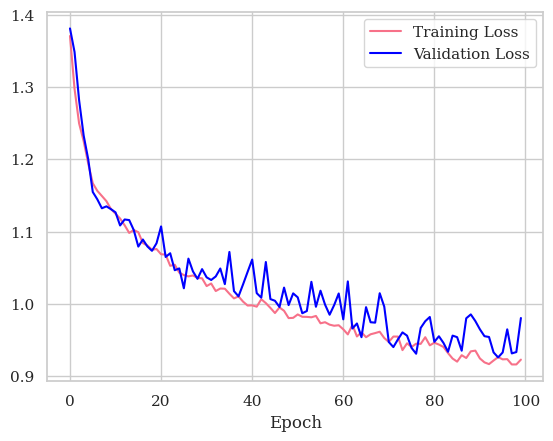

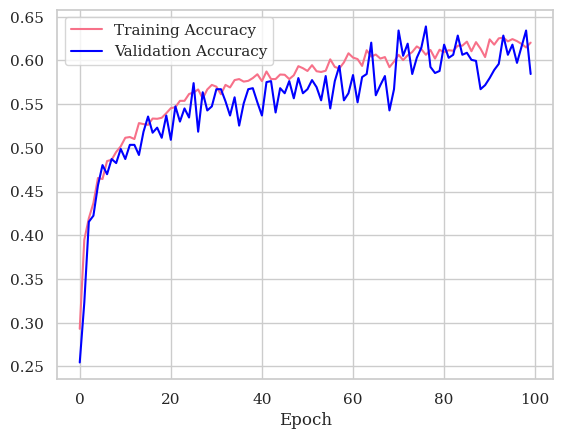

In [75]:
eegnet = build_eegnet_classifier()
eegnet, eegnet_results = CV_train(eegnet, np.expand_dims(X_train,-1), np.expand_dims(X_test,-1), n_epochs=100)

In [76]:
eegnet_results

{'Accuracy': [0.5844907407407407, 0.6516203703703703],
 'F1': [0.5656868363028261, 0.6439276067910379],
 'Precision': [0.6236449032847725, 0.6793830855201862],
 'Recall': [0.5844907407407407, 0.6516203703703703]}

In [104]:
test_pred = eegnet.predict(X_test_noise_2)
pred = (test_pred == test_pred.max(axis=1)[:,None]).astype(int)
print("Accuracy: ",accuracy_score(y_test.argmax(axis=1), pred.argmax(axis=1)))
print("F1: ",f1_score(y_test.argmax(axis=1), pred.argmax(axis=1), average='weighted'))
print("Precision: ",precision_score(y_test.argmax(axis=1), pred.argmax(axis=1),average='weighted'))
print("Recall: ",recall_score(y_test.argmax(axis=1), pred.argmax(axis=1),average='weighted'))
## SNR 15

27/27 [==============================] - 1s 18ms/step
Accuracy:  0.6157407407407407
F1:  0.6131609384190305
Precision:  0.6396812167864149
Recall:  0.6157407407407407


In [105]:
test_pred = eegnet.predict(X_test_noise)
pred = (test_pred == test_pred.max(axis=1)[:,None]).astype(int)
print("Accuracy: ",accuracy_score(y_test.argmax(axis=1), pred.argmax(axis=1)))
print("F1: ",f1_score(y_test.argmax(axis=1), pred.argmax(axis=1), average='weighted'))
print("Precision: ",precision_score(y_test.argmax(axis=1), pred.argmax(axis=1),average='weighted'))
print("Recall: ",recall_score(y_test.argmax(axis=1), pred.argmax(axis=1),average='weighted'))
## SNR 8

27/27 [==============================] - 1s 18ms/step
Accuracy:  0.5254629629629629
F1:  0.48767349456385695
Precision:  0.5851267475488261
Recall:  0.5254629629629629


In [78]:
eegnet.save('models/eegnet.h5')

In [103]:
eegnet = keras.models.load_model('models/eegnet.h5')

In [47]:
def square(x):
    return K.square(x)

def log(x):
    return K.log(K.clip(x, min_value = 1e-7, max_value = 10000)) 


In [48]:
def build_shallow_conv_net(nb_classes=4, Chans = 22, Samples = 1125, dropoutRate = 0.5):
    # start the model
    input_main   = Input((Chans, Samples, 1))
    block1       = Conv2D(40, (1, 13), 
                        input_shape=(Chans, Samples, 1),
                        kernel_constraint = max_norm(2., axis=(0,1,2)))(input_main)
    block1       = Conv2D(40, (Chans, 1), use_bias=False, 
                          kernel_constraint = max_norm(2., axis=(0,1,2)))(block1)
    block1       = BatchNormalization(epsilon=1e-05, momentum=0.9)(block1)
    block1       = Activation(square)(block1)
    block1       = AveragePooling2D(pool_size=(1, 35), strides=(1, 7))(block1)
    block1       = Activation(log)(block1)
    block1       = Dropout(dropoutRate)(block1)
    flatten      = Flatten()(block1)
    dense        = Dense(nb_classes, kernel_constraint = max_norm(0.5))(flatten)
    softmax      = Activation('softmax')(dense)
    return Model(inputs=input_main, outputs=softmax)

c:\Users\Sam\miniconda3\envs\pytgpu\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/100
108/108 [==============================] - 17s 151ms/step - loss: 1.5054 - accuracy: 0.3212 - val_loss: 1.4052 - val_accuracy: 0.3507
Epoch 2/100
108/108 [==============================] - 15s 143ms/step - loss: 1.3566 - accuracy: 0.3929 - val_loss: 1.3273 - val_accuracy: 0.4086
Epoch 3/100
108/108 [==============================] - 14s 134ms/step - loss: 1.2828 - accuracy: 0.4366 - val_loss: 1.4827 - val_accuracy: 0.3495
Epoch 4/100
108/108 [==============================] - 15s 138ms/step - loss: 1.2435 - accuracy: 0.4523 - val_loss: 1.2639 - val_accuracy: 0.4236
Epoch 5/100
108/108 [==============================] - 15s 141ms/step - loss: 1.2103 - accuracy: 0.4777 - val_loss: 1.2438 - val_accuracy: 0.4456
Epoch 6/100
108/108 [==============================] - 15s 143ms/step - loss: 1.1869 - accuracy: 0.4789 - val_loss: 1.3020 - val_accuracy: 0.4479
Epoch 7/100
108/108 [==============================] - 15s 138ms/step - loss: 1.1520 - accuracy: 0.5012 - val_loss: 1.2496 -

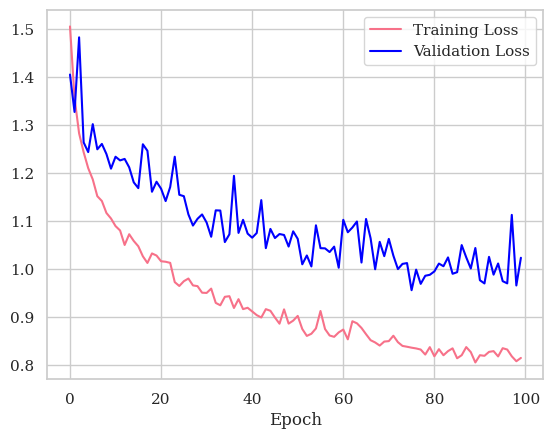

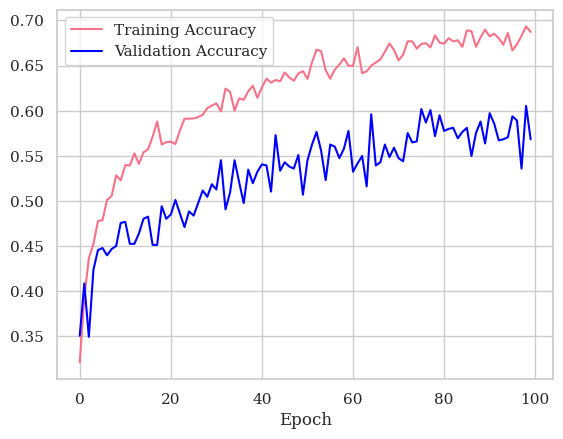

In [156]:
scn = build_shallow_conv_net()
scn.compile(optimizer=keras.optimizers.Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
scn, scn_results = CV_train(scn, np.expand_dims(X_train,-1), np.expand_dims(X_test,-1), n_epochs=100)

In [157]:
scn_results

{'Accuracy': [0.5682870370370371, 0.6145833333333334],
 'F1': [0.5645457612614778, 0.616098089154518],
 'Precision': [0.5814075294623892, 0.6290582541203776],
 'Recall': [0.5682870370370371, 0.6145833333333334]}

In [158]:
test_pred = scn.predict(np.expand_dims(X_test_noise_2,-1))
pred = (test_pred == test_pred.max(axis=1)[:,None]).astype(int)
print("Accuracy: ",accuracy_score(y_test.argmax(axis=1), pred.argmax(axis=1)))
print("F1: ",f1_score(y_test.argmax(axis=1), pred.argmax(axis=1), average='weighted'))
print("Precision: ",precision_score(y_test.argmax(axis=1), pred.argmax(axis=1),average='weighted'))
print("Recall: ",recall_score(y_test.argmax(axis=1), pred.argmax(axis=1),average='weighted'))
## SNR 15

27/27 [==============================] - 1s 31ms/step
Accuracy:  0.5636574074074074
F1:  0.5622026586567475
Precision:  0.6264537979386517
Recall:  0.5636574074074074


In [159]:
test_pred = scn.predict(np.expand_dims(X_test_noise,-1))
pred = (test_pred == test_pred.max(axis=1)[:,None]).astype(int)
print("Accuracy: ",accuracy_score(y_test.argmax(axis=1), pred.argmax(axis=1)))
print("F1: ",f1_score(y_test.argmax(axis=1), pred.argmax(axis=1), average='weighted'))
print("Precision: ",precision_score(y_test.argmax(axis=1), pred.argmax(axis=1),average='weighted'))
print("Recall: ",recall_score(y_test.argmax(axis=1), pred.argmax(axis=1),average='weighted'))
## SNR 8

27/27 [==============================] - 1s 33ms/step
Accuracy:  0.42592592592592593
F1:  0.38483418947818854
Precision:  0.6550406880383184
Recall:  0.42592592592592593


In [160]:
scn.save('models/scn.h5')

In [161]:
scn = keras.models.load_model('models/scn.h5', custom_objects={'square':square, 'log':log})

In [162]:
def build_deep_conv_net(nb_classes=4, Chans = 22, Samples = 1125, dropoutRate = 0.5):
    # start the model
    input_main   = Input((Chans, Samples, 1))
    block1       = Conv2D(25, (1, 5), 
                                 input_shape=(Chans, Samples, 1),
                                 kernel_constraint = max_norm(2., axis=(0,1,2)))(input_main)
    block1       = Conv2D(25, (Chans, 1),
                                 kernel_constraint = max_norm(2., axis=(0,1,2)))(block1)
    block1       = BatchNormalization(epsilon=1e-05, momentum=0.9)(block1)
    block1       = Activation('elu')(block1)
    block1       = MaxPooling2D(pool_size=(1, 2), strides=(1, 2))(block1)
    block1       = Dropout(dropoutRate)(block1)
  
    block2       = Conv2D(50, (1, 5),
                                 kernel_constraint = max_norm(2., axis=(0,1,2)))(block1)
    block2       = BatchNormalization(epsilon=1e-05, momentum=0.9)(block2)
    block2       = Activation('elu')(block2)
    block2       = MaxPooling2D(pool_size=(1, 2), strides=(1, 2))(block2)
    block2       = Dropout(dropoutRate)(block2)
    
    block3       = Conv2D(100, (1, 5),
                                 kernel_constraint = max_norm(2., axis=(0,1,2)))(block2)
    block3       = BatchNormalization(epsilon=1e-05, momentum=0.9)(block3)
    block3       = Activation('elu')(block3)
    block3       = MaxPooling2D(pool_size=(1, 2), strides=(1, 2))(block3)
    block3       = Dropout(dropoutRate)(block3)
    
    block4       = Conv2D(200, (1, 5),
                                 kernel_constraint = max_norm(2., axis=(0,1,2)))(block3)
    block4       = BatchNormalization(epsilon=1e-05, momentum=0.9)(block4)
    block4       = Activation('elu')(block4)
    block4       = MaxPooling2D(pool_size=(1, 2), strides=(1, 2))(block4)
    block4       = Dropout(dropoutRate)(block4)
    
    flatten      = Flatten()(block4)
    
    dense        = Dense(nb_classes, kernel_constraint = max_norm(0.5))(flatten)
    softmax      = Activation('softmax')(dense)
    
    return Model(inputs=input_main, outputs=softmax)

Epoch 1/100


c:\Users\Sam\miniconda3\envs\pytgpu\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


108/108 [==============================] - 16s 135ms/step - loss: 1.7101 - accuracy: 0.2674 - val_loss: 1.4290 - val_accuracy: 0.2674
Epoch 2/100
108/108 [==============================] - 14s 132ms/step - loss: 1.6226 - accuracy: 0.3128 - val_loss: 1.6824 - val_accuracy: 0.2581
Epoch 3/100
108/108 [==============================] - 14s 130ms/step - loss: 1.6078 - accuracy: 0.3229 - val_loss: 2.0796 - val_accuracy: 0.2593
Epoch 4/100
108/108 [==============================] - 14s 132ms/step - loss: 1.5285 - accuracy: 0.3264 - val_loss: 2.3370 - val_accuracy: 0.2477
Epoch 5/100
108/108 [==============================] - 14s 130ms/step - loss: 1.4526 - accuracy: 0.3469 - val_loss: 1.8725 - val_accuracy: 0.2639
Epoch 6/100
108/108 [==============================] - 14s 131ms/step - loss: 1.4221 - accuracy: 0.3657 - val_loss: 2.1352 - val_accuracy: 0.2569
Epoch 7/100
108/108 [==============================] - 14s 130ms/step - loss: 1.3766 - accuracy: 0.3799 - val_loss: 1.5885 - val_accurac

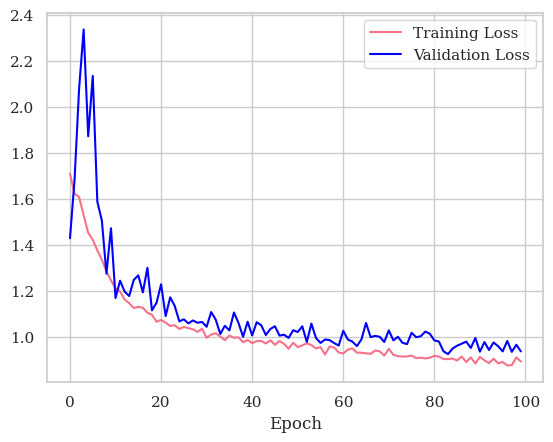

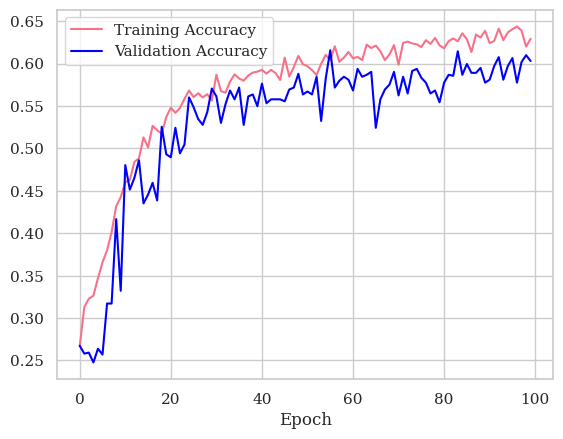

In [163]:
dcn = build_deep_conv_net()
dcn.compile(optimizer=keras.optimizers.Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
dcn, dcn_results = CV_train(dcn, np.expand_dims(X_train,-1), np.expand_dims(X_test,-1), n_epochs=100)

In [164]:
dcn_results

{'Accuracy': [0.6030092592592593, 0.6099537037037037],
 'F1': [0.5917885140072242, 0.5893488503579134],
 'Precision': [0.6067420271467648, 0.6183133726738377],
 'Recall': [0.6030092592592593, 0.6099537037037037]}

In [165]:
test_pred = dcn.predict(np.expand_dims(X_test_noise_2,-1))
pred = (test_pred == test_pred.max(axis=1)[:,None]).astype(int)
print("Accuracy: ",accuracy_score(y_test.argmax(axis=1), pred.argmax(axis=1)))
print("F1: ",f1_score(y_test.argmax(axis=1), pred.argmax(axis=1), average='weighted'))
print("Precision: ",precision_score(y_test.argmax(axis=1), pred.argmax(axis=1),average='weighted'))
print("Recall: ",recall_score(y_test.argmax(axis=1), pred.argmax(axis=1),average='weighted'))
## SNR 15

27/27 [==============================] - 1s 36ms/step
Accuracy:  0.5891203703703703
F1:  0.5777006594328525
Precision:  0.6003727520351626
Recall:  0.5891203703703703


In [166]:
test_pred = dcn.predict(np.expand_dims(X_test_noise,-1))
pred = (test_pred == test_pred.max(axis=1)[:,None]).astype(int)
print("Accuracy: ",accuracy_score(y_test.argmax(axis=1), pred.argmax(axis=1)))
print("F1: ",f1_score(y_test.argmax(axis=1), pred.argmax(axis=1), average='weighted'))
print("Precision: ",precision_score(y_test.argmax(axis=1), pred.argmax(axis=1),average='weighted'))
print("Recall: ",recall_score(y_test.argmax(axis=1), pred.argmax(axis=1),average='weighted'))
## SNR 8

27/27 [==============================] - 1s 38ms/step
Accuracy:  0.5590277777777778
F1:  0.547928522428475
Precision:  0.5876595148909717
Recall:  0.5590277777777778


In [167]:
dcn.save('models/dcn.h5')

In [168]:
dcn = keras.models.load_model('models/dcn.h5')

In [56]:
n_epochs=100
from skorch.callbacks import LRScheduler
callbacks = [("lr_scheduler", LRScheduler('CosineAnnealingLR', T_max=n_epochs - 1)),]
eegv4 = NeuralNetClassifier(module=EEGNetv4,
        iterator_train=AugmentedDataLoader,  # This tells EEGClassifier to use a custom DataLoader
        iterator_train__transforms=transforms, 
        module__n_chans=22,
        module__n_outputs=4,
        module__n_times=1125,
        module__kernel_length=32,
        module__drop_prob=0.5,
        criterion=torch.nn.CrossEntropyLoss,
        optimizer=torch.optim.Adam,
        optimizer__lr=0.001,
        train_split=None,
        iterator_train__shuffle=True,
        batch_size=32,
        callbacks=callbacks,
        device='cuda' if cuda else 'cpu',
        verbose=verbose
        )

eegv4.fit(X_train, y_train, epochs=n_epochs)

  epoch    train_loss      lr     dur
-------  ------------  ------  ------
      1        1.4463  0.0010  4.5986
      2        1.4106  0.0010  4.7098
      3        1.3817  0.0010  4.6781
      4        1.3439  0.0010  4.6909
      5        1.3127  0.0010  4.4849
      6        1.2943  0.0010  4.8243
      7        1.2783  0.0010  4.8908
      8        1.2685  0.0010  4.6780
      9        1.2478  0.0010  4.7908
     10        1.2234  0.0010  4.8241
     11        1.2223  0.0010  4.9058
     12        1.1986  0.0010  4.6839
     13        1.1935  0.0010  4.7315
     14        1.1988  0.0010  4.7353
     15        1.1864  0.0010  4.6898
     16        1.1854  0.0009  4.5276
     17        1.1785  0.0009  4.4606
     18        1.1736  0.0009  4.6330
     19        1.1588  0.0009  4.5833
     20        1.1584  0.0009  4.5158
     21        1.1541  0.0009  4.6649
     22        1.1579  0.0009  4.8569
     23        1.1486  0.0009  4.7072
     24        1.1548  0.0009  4.6023
     25     

<class 'skorch.classifier.NeuralNetClassifier'>[initialized](
  module_=======================================================================================================================================================
  Layer (type (var_name):depth-idx)                  Input Shape               Output Shape              Param #                   Kernel Shape
  EEGNetv4 (EEGNetv4)                                [1, 22, 1125]             [1, 4]                    --                        --
  ├─Ensure4d (ensuredims): 1-1                       [1, 22, 1125]             [1, 22, 1125, 1]          --                        --
  ├─Rearrange (dimshuffle): 1-2                      [1, 22, 1125, 1]          [1, 1, 22, 1125]          --                        --
  ├─Conv2d (conv_temporal): 1-3                      [1, 1, 22, 1125]          [1, 8, 22, 1126]          256                       [1, 32]
  ├─BatchNorm2d (bnorm_temporal): 1-4                [1, 8, 22, 1126]          [1, 8, 22, 11

In [61]:
test_metrics(eegv4)

Accuracy:  0.5451388888888888
Precision:  0.5519830927492264
Recall:  0.5451388888888888
F1:  0.5181818014274546


Train Accuracy:  0.5539351851851851
Test Accuracy:  0.5451388888888888


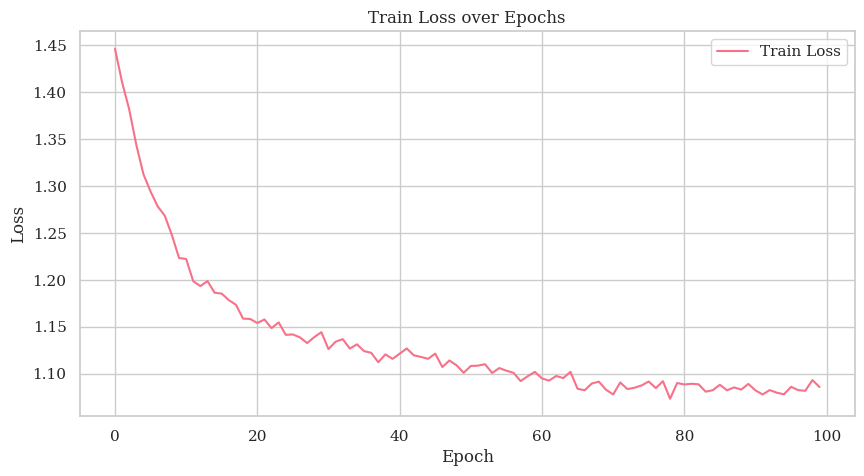

In [62]:
print("Train Accuracy: ", eegv4.score(X_train, np.argmax(y_train, axis=1)))
print("Test Accuracy: ", eegv4.score(X_test, np.argmax(y_test, axis=1)))

train_loss = eegv4.history[:, 'train_loss']
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [63]:
from braindecode.models import *

In [64]:
callbacks = [("lr_scheduler", LRScheduler('CosineAnnealingLR', T_max=n_epochs - 1))]
atcnet = NeuralNetClassifier(module=ATCNet,
        iterator_train=AugmentedDataLoader,  # This tells EEGClassifier to use a custom DataLoader
        iterator_train__transforms=transforms, 
        module__n_chans=22,
        module__n_outputs=4,
        module__n_times=1125,
        module__add_log_softmax=False,
        # module__kernel_length=32,
        # module__drop_prob=0.5,
        criterion=torch.nn.CrossEntropyLoss,
        optimizer=torch.optim.Adam,
        optimizer__lr=0.001,
        train_split=None,
        iterator_train__shuffle=True,
        batch_size=32,
        callbacks=callbacks,
        device='cuda' if cuda else 'cpu',
        verbose=verbose
        )
# clf.callbacks.append(TrainEndCheckpoint(dirname=save_dir + f'\\S{subject}'))
atcnet.fit(X_train, y_train, epochs=100)

  epoch    train_loss      lr     dur
-------  ------------  ------  ------
      1        1.4096  0.0010  9.9732
      2        1.3448  0.0010  10.2152
      3        1.2960  0.0010  10.5175
      4        1.2621  0.0010  10.3549
      5        1.2128  0.0010  10.2877
      6        1.1924  0.0010  10.2836
      7        1.1692  0.0010  10.2064
      8        1.1529  0.0010  10.2021
      9        1.1409  0.0010  9.9824
     10        1.1257  0.0010  10.2055
     11        1.1167  0.0010  10.1648
     12        1.1026  0.0010  10.0437
     13        1.0972  0.0010  10.1840
     14        1.0941  0.0010  10.1157
     15        1.0769  0.0010  10.0691
     16        1.0800  0.0009  9.9373
     17        1.0646  0.0009  10.0730
     18        1.0637  0.0009  9.8624
     19        1.0579  0.0009  10.0267
     20        1.0514  0.0009  10.1666
     21        1.0497  0.0009  9.9188
     22        1.0426  0.0009  10.0036
     23        1.0269  0.0009  10.0634
     24        1.0241  0.0009  1

<class 'skorch.classifier.NeuralNetClassifier'>[initialized](
  module_============================================================================================================================================================
  Layer (type (var_name):depth-idx)                       Input Shape               Output Shape              Param #                   Kernel Shape
  ATCNet (ATCNet)                                         [1, 22, 1125]             [1, 4]                    --                        --
  ├─Ensure4d (ensuredims): 1-1                            [1, 22, 1125]             [1, 22, 1125, 1]          --                        --
  ├─Rearrange (dimshuffle): 1-2                           [1, 22, 1125, 1]          [1, 1, 1125, 22]          --                        --
  ├─_ConvBlock (conv_block): 1-3                          [1, 1, 1125, 22]          [1, 32, 20, 1]            --                        --
  │    └─Conv2d (conv1): 2-1                              [1, 1, 11

Train Accuracy:  0.8236111111111111
Test Accuracy:  0.7071759259259259


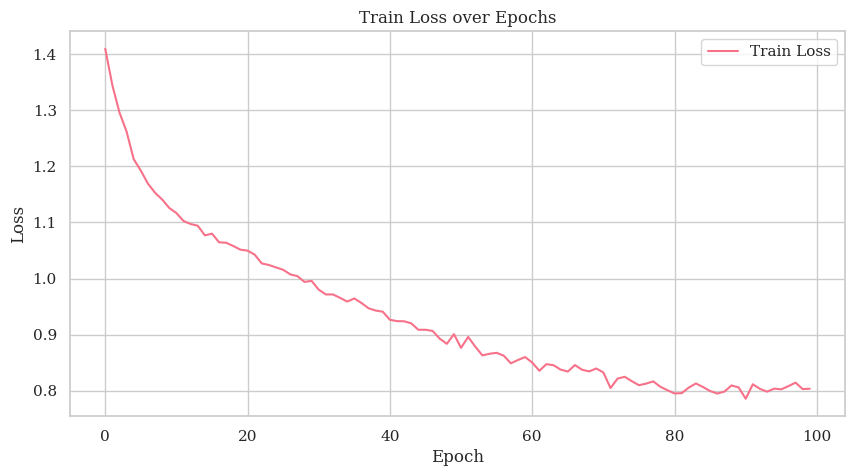

In [65]:
print("Train Accuracy: ", atcnet.score(X_train, np.argmax(y_train, axis=1)))
print("Test Accuracy: ", atcnet.score(X_test, np.argmax(y_test, axis=1)))

train_loss = atcnet.history[:, 'train_loss']
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [66]:
test_metrics(atcnet)

Accuracy:  0.7071759259259259
Precision:  0.7087417909335018
Recall:  0.7071759259259259
F1:  0.7060531127686849


In [67]:
callbacks = [("lr_scheduler", LRScheduler('CosineAnnealingLR', T_max=n_epochs - 1))]
conformer = NeuralNetClassifier(module=EEGConformer,
        iterator_train=AugmentedDataLoader,  # This tells EEGClassifier to use a custom DataLoader
        iterator_train__transforms=transforms, 
        module__n_chans=22,
        module__n_outputs=4,
        module__n_times=1125,
        module__final_fc_length='auto',
        module__add_log_softmax=False,
        criterion=torch.nn.CrossEntropyLoss,
        optimizer=torch.optim.Adam,
        optimizer__betas=(0.5, 0.999),
        optimizer__lr=0.001,
        train_split=None,
        iterator_train__shuffle=True,
        batch_size=32,
        callbacks=callbacks,
        device='cuda' if cuda else 'cpu',
        verbose=verbose
        )
# clf.callbacks.append(TrainEndCheckpoint(dirname=save_dir + f'\\S{subject}'))
conformer.fit(X_train, y_train, epochs=100)

  epoch    train_loss      lr     dur
-------  ------------  ------  ------
      1        1.4305  0.0010  8.8495
      2        1.4091  0.0010  8.7710
      3        1.3893  0.0010  9.0178
      4        1.3433  0.0010  9.0975
      5        1.3142  0.0010  9.2591
      6        1.2959  0.0010  9.5554
      7        1.2816  0.0010  9.6236
      8        1.2774  0.0010  9.9681
      9        1.2673  0.0010  9.8197
     10        1.2618  0.0010  10.2445
     11        1.2520  0.0010  10.1901
     12        1.2231  0.0010  10.1622
     13        1.2073  0.0010  10.3443
     14        1.1798  0.0010  10.2272
     15        1.1716  0.0010  10.9177
     16        1.1504  0.0009  10.6259
     17        1.1431  0.0009  10.7098
     18        1.1346  0.0009  10.8751
     19        1.1275  0.0009  10.7770
     20        1.1246  0.0009  11.1131
     21        1.1166  0.0009  11.2415
     22        1.1105  0.0009  11.2692
     23        1.1071  0.0009  11.3132
     24        1.1000  0.0009  10.83

<class 'skorch.classifier.NeuralNetClassifier'>[initialized](
  module_=================================================================================================================================================================
  Layer (type (var_name):depth-idx)                            Input Shape               Output Shape              Param #                   Kernel Shape
  EEGConformer (EEGConformer)                                  [1, 22, 1125]             [1, 4]                    --                        --
  ├─_PatchEmbedding (patch_embedding): 1-1                     [1, 1, 22, 1125]          [1, 69, 40]               --                        --
  │    └─Sequential (shallownet): 2-1                          [1, 1, 22, 1125]          [1, 40, 1, 69]            --                        --
  │    │    └─Conv2d (0): 3-1                                  [1, 1, 22, 1125]          [1, 40, 22, 1101]         1,040                     [1, 25]
  │    │    └─Conv2d (1): 3-2   

Train Accuracy:  0.8118055555555556
Test Accuracy:  0.5636574074074074


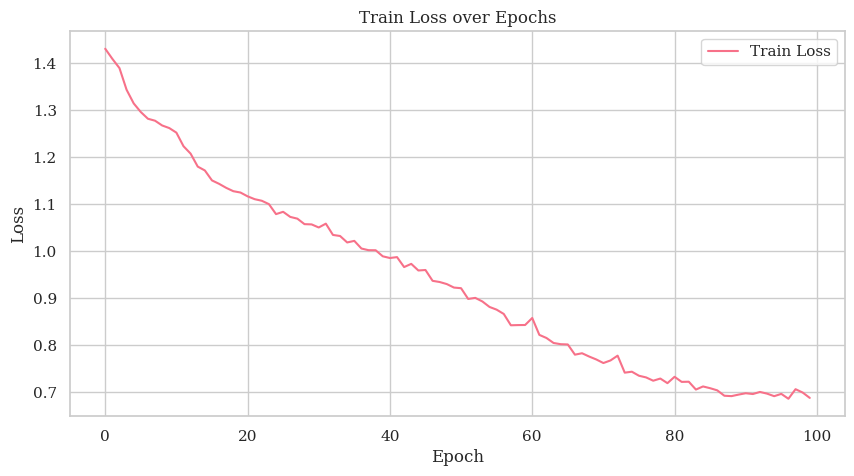

In [68]:
print("Train Accuracy: ", conformer.score(X_train, np.argmax(y_train, axis=1)))
print("Test Accuracy: ", conformer.score(X_test, np.argmax(y_test, axis=1)))

train_loss = conformer.history[:, 'train_loss']
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [69]:
test_metrics(conformer)

Accuracy:  0.5636574074074074
Precision:  0.5592662716513715
Recall:  0.5636574074074074
F1:  0.558783288287435


In [70]:
import torch
from braindecode.util import set_random_seeds
from braindecode.models import ShallowFBCSPNet

cuda = torch.cuda.is_available()  # check if GPU is available, if True chooses to use it
device = 'cuda' if cuda else 'cpu'
if cuda:
    torch.backends.cudnn.benchmark = True
seed = 20200220  # random seed to make results reproducible
# Set random seed to be able to reproduce results
set_random_seeds(seed=seed, cuda=cuda)

n_classes=4
# Extract number of chans and time steps from dataset
n_chans = 22
input_window_samples = 1125

model = ShallowFBCSPNet(
    n_chans,
    n_classes,
    input_window_samples=input_window_samples,
    final_conv_length='auto',
)

# Send model to GPU
if cuda:
    model.cuda()
    

c:\Users\Sam\miniconda3\envs\pytgpu\lib\site-packages\braindecode\util.py:51: UserWarning: torch.backends.cudnn.benchmark was set to True which may results in lack of reproducibility. In some cases to ensure reproducibility you may need to set torch.backends.cudnn.benchmark to False.
  warn(
c:\Users\Sam\miniconda3\envs\pytgpu\lib\site-packages\braindecode\models\base.py:23: UserWarning: ShallowFBCSPNet: 'input_window_samples' is depreciated. Use 'n_times' instead.
  warnings.warn(
c:\Users\Sam\miniconda3\envs\pytgpu\lib\site-packages\braindecode\models\base.py:180: UserWarning: LogSoftmax final layer will be removed! Please adjust your loss function accordingly (e.g. CrossEntropyLoss)!
  warnings.warn("LogSoftmax final layer will be removed! " +


In [71]:
from skorch.callbacks import LRScheduler
from skorch.helper import predefined_split

from braindecode import EEGClassifier

# These values we found good for shallow network:
lr = 0.0625 * 0.01
weight_decay = 0

# For deep4 they should be:
# lr = 1 * 0.01
# weight_decay = 0.5 * 0.001

batch_size = 64
n_epochs = 100


shallowfbcsp = EEGClassifier(
    model,
    iterator_train=AugmentedDataLoader,  # This tells EEGClassifier to use a custom DataLoader
    iterator_train__transforms=transforms, 
    criterion=torch.nn.NLLLoss,
    optimizer=torch.optim.AdamW,
    train_split=None,  # using valid_set for validation
    optimizer__lr=lr,
    optimizer__weight_decay=weight_decay,
    batch_size=batch_size,
    callbacks=[
        "accuracy", ("lr_scheduler", LRScheduler('CosineAnnealingLR', T_max=n_epochs - 1)),
    ],
    device=device,
)
# Model training for a specified number of epochs. `y` is None as it is already supplied
# in the dataset.
shallowfbcsp.fit(X_train, np.argmax(y_train, axis=1), epochs=n_epochs)

  epoch    train_accuracy    train_loss      lr     dur
-------  ----------------  ------------  ------  ------
      1            0.4134        1.5786  0.0006  4.6850
      2            0.4801        1.4211  0.0006  4.5579
      3            0.5222        1.3283  0.0006  4.2348
      4            0.5340        1.2721  0.0006  4.1920
      5            0.5546        1.2206  0.0006  4.0120
      6            0.5785        1.1871  0.0006  4.7696
      7            0.5921        1.1586  0.0006  3.9877
      8            0.5995        1.1239  0.0006  4.4405
      9            0.6067        1.0988  0.0006  3.9009
     10            0.6296        1.0599  0.0006  4.3667
     11            0.6350        1.0323  0.0006  4.0424
     12            0.6488        1.0309  0.0006  3.7763
     13            0.6507        1.0034  0.0006  4.1641
     14            0.6824        1.0028  0.0006  3.8062
     15            0.6683        0.9722  0.0006  3.8153
     16            0.6676        0.9493  0.0006 

<class 'braindecode.classifier.EEGClassifier'>[initialized](
  module_=============================================================================================================================================
  Layer (type (var_name):depth-idx)        Input Shape               Output Shape              Param #                   Kernel Shape
  ShallowFBCSPNet (ShallowFBCSPNet)        [1, 22, 1125]             [1, 4]                    --                        --
  ├─Ensure4d (ensuredims): 1-1             [1, 22, 1125]             [1, 22, 1125, 1]          --                        --
  ├─Rearrange (dimshuffle): 1-2            [1, 22, 1125, 1]          [1, 1, 1125, 22]          --                        --
  ├─CombinedConv (conv_time_spat): 1-3     [1, 1, 1125, 22]          [1, 40, 1101, 1]          36,240                    --
  ├─BatchNorm2d (bnorm): 1-4               [1, 40, 1101, 1]          [1, 40, 1101, 1]          80                        --
  ├─Expression (conv_nonlin_exp): 

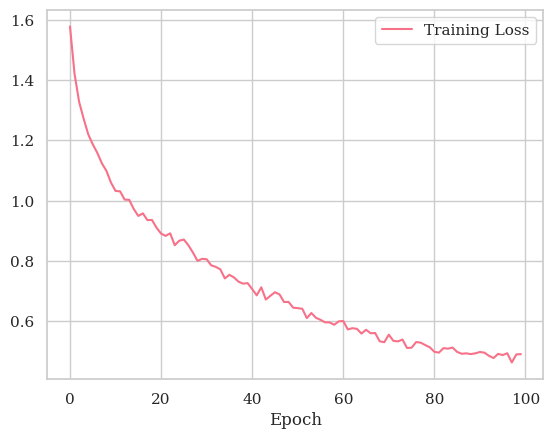

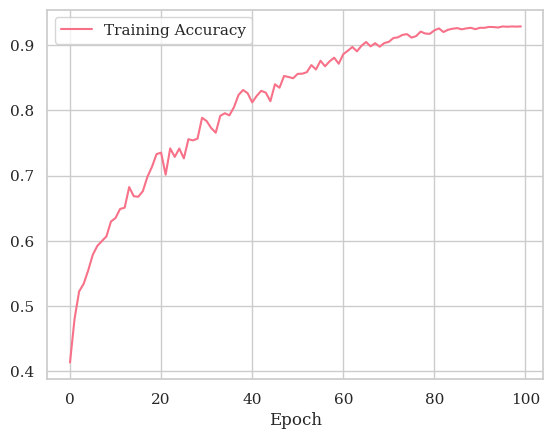

In [72]:
loss = []
acc = []
for a in shallowfbcsp.history:
    loss.append(a['train_loss'])    
    acc.append(a['train_accuracy'])
plt.plot(loss, label='Training Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()
plt.plot(acc, label='Training Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [73]:
shallowfbcsp.score(X_test, np.argmax(y_test, axis=1))

0.6296296296296297

In [74]:
test_metrics(shallowfbcsp)

Accuracy:  0.6296296296296297
Precision:  0.6302102624729181
Recall:  0.6296296296296297
F1:  0.6296048591879575


In [75]:
from skorch.callbacks import LRScheduler
from skorch.helper import predefined_split

from braindecode import EEGClassifier

# These values we found good for shallow network:
lr = 0.0625 * 0.01
weight_decay = 0


# For deep4 they should be:
lr = 1 * 0.01
weight_decay = 0.5 * 0.001

model = EEGNetv4(
    n_chans,
    n_classes,
    input_window_samples=input_window_samples,
    final_conv_length='auto',
)


batch_size = 64
n_epochs = 100

eegnetv4 = EEGClassifier(
    model,
    iterator_train=AugmentedDataLoader,  # This tells EEGClassifier to use a custom DataLoader
    iterator_train__transforms=transforms, 
    criterion=torch.nn.CrossEntropyLoss,
    optimizer=torch.optim.AdamW,
    train_split=None,  # using valid_set for validation
    optimizer__lr=lr,
    optimizer__weight_decay=weight_decay,
    batch_size=batch_size,
    callbacks=[
        "accuracy", ("lr_scheduler", LRScheduler('CosineAnnealingLR', T_max=n_epochs - 1)),
    ],
    device=device,
)
# Model training for a specified number of epochs. `y` is None as it is already supplied
# in the dataset.
eegnetv4.fit(X_train, np.argmax(y_train, axis=1), epochs=n_epochs)

c:\Users\Sam\miniconda3\envs\pytgpu\lib\site-packages\braindecode\models\base.py:23: UserWarning: EEGNetv4: 'input_window_samples' is depreciated. Use 'n_times' instead.
  warnings.warn(


  epoch    train_accuracy    train_loss      lr     dur
-------  ----------------  ------------  ------  ------
      1            0.3639        1.3877  0.0100  4.1914
      2            0.4525        1.2975  0.0100  3.7889
      3            0.4919        1.2234  0.0100  3.8748
      4            0.5123        1.1876  0.0100  3.9222
      5            0.4947        1.1795  0.0100  3.9293
      6            0.4840        1.1746  0.0099  3.8716
      7            0.5329        1.1552  0.0099  3.9830
      8            0.5162        1.1507  0.0099  3.9657
      9            0.5597        1.1424  0.0098  4.0422
     10            0.4403        1.1555  0.0098  4.1757
     11            0.5421        1.1390  0.0098  4.3238
     12            0.5312        1.1401  0.0097  4.1445
     13            0.5088        1.1245  0.0096  4.3614
     14            0.5331        1.1124  0.0096  4.4345
     15            0.4995        1.1233  0.0095  4.5029
     16            0.5370        1.1392  0.0094 

<class 'braindecode.classifier.EEGClassifier'>[initialized](
  module_=======================================================================================================================================================
  Layer (type (var_name):depth-idx)                  Input Shape               Output Shape              Param #                   Kernel Shape
  EEGNetv4 (EEGNetv4)                                [1, 22, 1125]             [1, 4]                    --                        --
  ├─Ensure4d (ensuredims): 1-1                       [1, 22, 1125]             [1, 22, 1125, 1]          --                        --
  ├─Rearrange (dimshuffle): 1-2                      [1, 22, 1125, 1]          [1, 1, 22, 1125]          --                        --
  ├─Conv2d (conv_temporal): 1-3                      [1, 1, 22, 1125]          [1, 8, 22, 1126]          512                       [1, 64]
  ├─BatchNorm2d (bnorm_temporal): 1-4                [1, 8, 22, 1126]          [1, 8, 22, 112

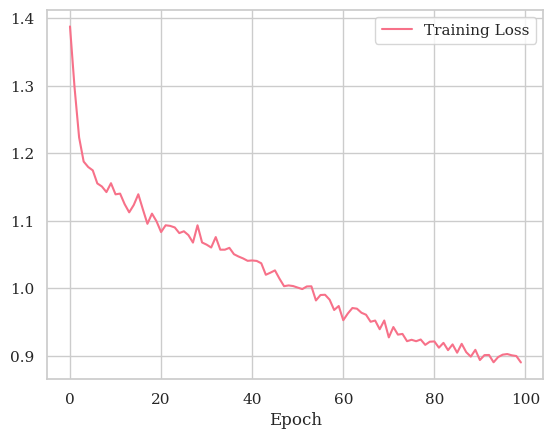

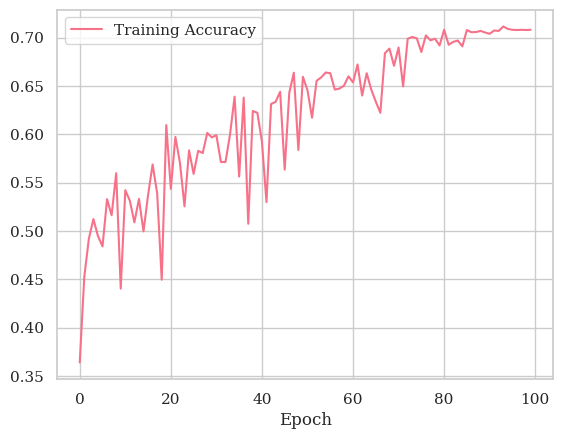

In [76]:
loss = []
acc = []
for a in eegnetv4.history:
    loss.append(a['train_loss'])    
    acc.append(a['train_accuracy'])
plt.plot(loss, label='Training Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()
plt.plot(acc, label='Training Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [77]:
eegnetv4.score(X_test, np.argmax(y_test, axis=1))

0.6678240740740741

In [78]:
test_metrics(eegnetv4)

Accuracy:  0.6678240740740741
Precision:  0.674540258615442
Recall:  0.6678240740740741
F1:  0.667913373731376


In [79]:
from skorch.callbacks import LRScheduler
from skorch.helper import predefined_split

from braindecode import EEGClassifier

# These values we found good for shallow network:
lr = 0.0625 * 0.01
weight_decay = 0

model = EEGNetv1(
    n_chans,
    n_classes,
    input_window_samples=input_window_samples,
    final_conv_length='auto',
)

# For deep4 they should be:
lr = 1 * 0.01
weight_decay = 0.5 * 0.001

batch_size = 64
n_epochs = 100

eegnetv1 = EEGClassifier(
    model,
    iterator_train=AugmentedDataLoader,  # This tells EEGClassifier to use a custom DataLoader
    iterator_train__transforms=transforms, 
    criterion=torch.nn.CrossEntropyLoss,
    optimizer=torch.optim.AdamW,
    train_split=None,  # using valid_set for validation
    optimizer__lr=lr,
    optimizer__weight_decay=weight_decay,
    batch_size=batch_size,
    callbacks=[
        "accuracy", ("lr_scheduler", LRScheduler('CosineAnnealingLR', T_max=n_epochs - 1)),
    ],
    device=device,
)
# Model training for a specified number of epochs. `y` is None as it is already supplied
# in the dataset.
eegnetv1.fit(X_train, np.argmax(y_train, axis=1), epochs=n_epochs)

c:\Users\Sam\miniconda3\envs\pytgpu\lib\site-packages\braindecode\models\base.py:23: UserWarning: EEGNetv1: 'input_window_samples' is depreciated. Use 'n_times' instead.
  warnings.warn(
c:\Users\Sam\miniconda3\envs\pytgpu\lib\site-packages\braindecode\models\base.py:180: UserWarning: LogSoftmax final layer will be removed! Please adjust your loss function accordingly (e.g. CrossEntropyLoss)!
  warnings.warn("LogSoftmax final layer will be removed! " +


  epoch    train_accuracy    train_loss      lr     dur
-------  ----------------  ------------  ------  ------
      1            0.2720        1.7232  0.0006  5.4845
      2            0.3067        1.6036  0.0006  5.3392
      3            0.3479        1.5040  0.0006  5.3241
      4            0.3736        1.4445  0.0006  5.3047
      5            0.3389        1.4181  0.0006  5.4424
      6            0.3852        1.3724  0.0006  5.5357
      7            0.3676        1.3540  0.0006  5.5563
      8            0.3410        1.3306  0.0006  5.6337
      9            0.4171        1.3216  0.0006  5.5000
     10            0.3958        1.3162  0.0006  5.6911
     11            0.3366        1.2868  0.0006  5.4919
     12            0.4106        1.2785  0.0006  5.4964
     13            0.4160        1.2520  0.0006  5.6395
     14            0.4354        1.2436  0.0006  5.5961
     15            0.4132        1.2323  0.0006  5.9139
     16            0.3942        1.2237  0.0006 

<class 'braindecode.classifier.EEGClassifier'>[initialized](
  module_=============================================================================================================================================
  Layer (type (var_name):depth-idx)        Input Shape               Output Shape              Param #                   Kernel Shape
  EEGNetv1 (EEGNetv1)                      [1, 22, 1125]             [1, 4]                    --                        --
  ├─Ensure4d (ensuredims): 1-1             [1, 22, 1125]             [1, 22, 1125, 1]          --                        --
  ├─Conv2d (conv_1): 1-2                   [1, 22, 1125, 1]          [1, 16, 1125, 1]          368                       [1, 1]
  ├─BatchNorm2d (bnorm_1): 1-3             [1, 16, 1125, 1]          [1, 16, 1125, 1]          32                        --
  ├─Expression (elu_1): 1-4                [1, 16, 1125, 1]          [1, 16, 1125, 1]          --                        --
  ├─Expression (permute_1): 1-

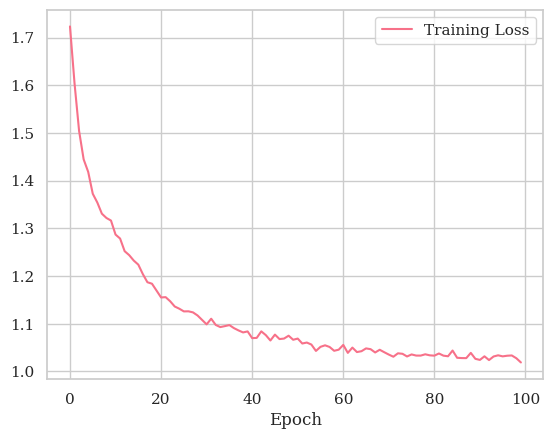

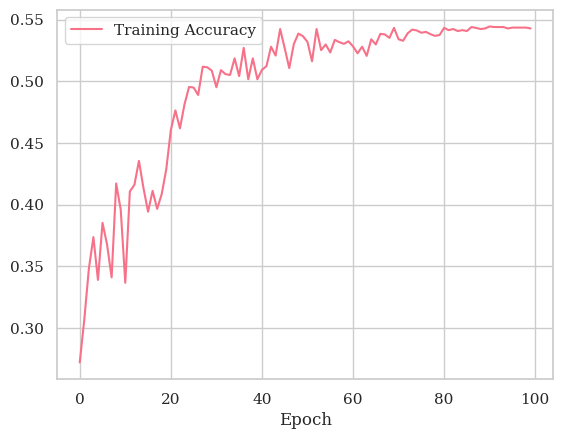

In [80]:
loss = []
acc = []
for a in eegnetv1.history:
    loss.append(a['train_loss'])    
    acc.append(a['train_accuracy'])
plt.plot(loss, label='Training Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()
plt.plot(acc, label='Training Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [81]:
eegnetv1.score(X_test, np.argmax(y_test, axis=1))

0.5034722222222222

In [ ]:
test_metrics(eegnetv1)


Accuracy:  0.5648148148148148
Precision:  0.6177733027585666
Recall:  0.5648148148148148
F1:  0.5490981695810621


In [83]:
from skorch.callbacks import LRScheduler
from skorch.helper import predefined_split

from braindecode import EEGClassifier

# These values we found good for shallow network:
lr = 0.0625 * 0.01
weight_decay = 0

model = Deep4Net(
    n_chans,
    n_classes,
    input_window_samples=input_window_samples,
    final_conv_length='auto',
)

# For deep4 they should be:
# lr = 1 * 0.01
# weight_decay = 0.5 * 0.001

batch_size = 64
n_epochs = 100

deep4net = EEGClassifier(
    model,
    iterator_train=AugmentedDataLoader,  # This tells EEGClassifier to use a custom DataLoader
    iterator_train__transforms=transforms, 
    criterion=torch.nn.CrossEntropyLoss,
    optimizer=torch.optim.AdamW,
    train_split=None,  # using valid_set for validation
    optimizer__lr=lr,
    optimizer__weight_decay=weight_decay,
    batch_size=batch_size,
    callbacks=[
        "accuracy", ("lr_scheduler", LRScheduler('CosineAnnealingLR', T_max=n_epochs - 1)),
    ],
    device=device,
)
# Model training for a specified number of epochs. `y` is None as it is already supplied
# in the dataset.
deep4net.fit(X_train, np.argmax(y_train, axis=1), epochs=n_epochs)

c:\Users\Sam\miniconda3\envs\pytgpu\lib\site-packages\braindecode\models\base.py:23: UserWarning: Deep4Net: 'input_window_samples' is depreciated. Use 'n_times' instead.
  warnings.warn(
c:\Users\Sam\miniconda3\envs\pytgpu\lib\site-packages\braindecode\models\base.py:180: UserWarning: LogSoftmax final layer will be removed! Please adjust your loss function accordingly (e.g. CrossEntropyLoss)!
  warnings.warn("LogSoftmax final layer will be removed! " +


  epoch    train_accuracy    train_loss      lr     dur
-------  ----------------  ------------  ------  ------
      1            0.2678        1.7419  0.0006  4.3605
      2            0.2604        1.6678  0.0006  4.3593
      3            0.2616        1.6456  0.0006  4.2670
      4            0.2863        1.5765  0.0006  4.2403
      5            0.2542        1.5516  0.0006  4.1394
      6            0.2752        1.5189  0.0006  4.2003
      7            0.2931        1.4645  0.0006  3.8676
      8            0.2789        1.4561  0.0006  4.0778
      9            0.3157        1.4178  0.0006  3.9867
     10            0.3553        1.3729  0.0006  4.1623
     11            0.3699        1.3612  0.0006  3.8687
     12            0.3454        1.3318  0.0006  4.0895
     13            0.3720        1.3102  0.0006  3.9685
     14            0.3931        1.3160  0.0006  3.8310
     15            0.3657        1.2967  0.0006  3.8496
     16            0.3650        1.2868  0.0006 

<class 'braindecode.classifier.EEGClassifier'>[initialized](
  module_=============================================================================================================================================
  Layer (type (var_name):depth-idx)        Input Shape               Output Shape              Param #                   Kernel Shape
  Deep4Net (Deep4Net)                      [1, 22, 1125]             [1, 4]                    --                        --
  ├─Ensure4d (ensuredims): 1-1             [1, 22, 1125]             [1, 22, 1125, 1]          --                        --
  ├─Rearrange (dimshuffle): 1-2            [1, 22, 1125, 1]          [1, 1, 1125, 22]          --                        --
  ├─CombinedConv (conv_time_spat): 1-3     [1, 1, 1125, 22]          [1, 25, 1116, 1]          14,025                    --
  ├─BatchNorm2d (bnorm): 1-4               [1, 25, 1116, 1]          [1, 25, 1116, 1]          50                        --
  ├─Expression (conv_nonlin): 1-5 

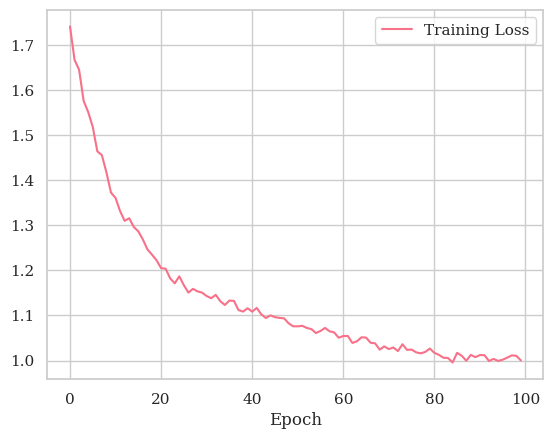

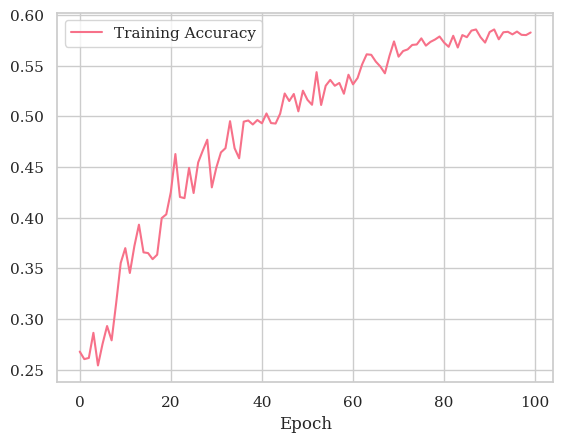

In [84]:
loss = []
acc = []
for a in deep4net.history:
    loss.append(a['train_loss'])    
    acc.append(a['train_accuracy'])
plt.plot(loss, label='Training Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()
plt.plot(acc, label='Training Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [85]:
deep4net.score(X_test, np.argmax(y_test, axis=1))

0.5277777777777778

In [86]:
test_metrics(deep4net)

Accuracy:  0.5277777777777778
Precision:  0.5266367491654061
Recall:  0.5277777777777778
F1:  0.4964684915412467


In [87]:
from skorch.callbacks import LRScheduler
from skorch.helper import predefined_split

from braindecode import EEGClassifier

# These values we found good for shallow network:
lr = 0.0625 * 0.01
weight_decay = 0

model = EEGITNet(

    n_classes,
        n_chans,
    input_window_samples=input_window_samples,
)

# For deep4 they should be:
# lr = 1 * 0.01
# weight_decay = 0.5 * 0.001

batch_size = 64
n_epochs = 100

eegitnet = EEGClassifier(
    model,
    iterator_train=AugmentedDataLoader,  # This tells EEGClassifier to use a custom DataLoader
    iterator_train__transforms=transforms, 
    criterion=torch.nn.CrossEntropyLoss,
    optimizer=torch.optim.AdamW,
    train_split=None,  # using valid_set for validation
    optimizer__lr=lr,
    optimizer__weight_decay=weight_decay,
    batch_size=batch_size,
    callbacks=[
        "accuracy", ("lr_scheduler", LRScheduler('CosineAnnealingLR', T_max=n_epochs - 1)),
    ],
    device=device,
)
# Model training for a specified number of epochs. `y` is None as it is already supplied
# in the dataset.
eegitnet.fit(X_train, np.argmax(y_train, axis=1), epochs=n_epochs)

c:\Users\Sam\miniconda3\envs\pytgpu\lib\site-packages\braindecode\models\base.py:23: UserWarning: EEGITNet: 'input_window_samples' is depreciated. Use 'n_times' instead.
  warnings.warn(
c:\Users\Sam\miniconda3\envs\pytgpu\lib\site-packages\braindecode\models\base.py:180: UserWarning: LogSoftmax final layer will be removed! Please adjust your loss function accordingly (e.g. CrossEntropyLoss)!
  warnings.warn("LogSoftmax final layer will be removed! " +


  epoch    train_accuracy    train_loss      lr     dur
-------  ----------------  ------------  ------  ------
      1            0.2681        1.4214  0.0006  4.7888
      2            0.2870        1.4045  0.0006  4.6038
      3            0.2919        1.3892  0.0006  4.3501
      4            0.2968        1.3708  0.0006  4.5053
      5            0.2926        1.3582  0.0006  4.5458
      6            0.3051        1.3318  0.0006  4.7232
      7            0.3338        1.3264  0.0006  4.8545
      8            0.3775        1.3072  0.0006  4.8650
      9            0.3972        1.2976  0.0006  4.8534
     10            0.4123        1.2806  0.0006  4.9727
     11            0.4150        1.2594  0.0006  5.0577
     12            0.4417        1.2598  0.0006  5.1752
     13            0.4389        1.2342  0.0006  5.1092
     14            0.4356        1.2387  0.0006  5.1195
     15            0.4375        1.2136  0.0006  5.2445
     16            0.4380        1.2145  0.0006 

<class 'braindecode.classifier.EEGClassifier'>[initialized](
  module_=======================================================================================================================================================
  Layer (type (var_name):depth-idx)                  Input Shape               Output Shape              Param #                   Kernel Shape
  EEGITNet (EEGITNet)                                [1, 22, 1125]             [1, 4]                    --                        --
  ├─Sequential (input_preprocess): 1-1               [1, 22, 1125]             [1, 1, 22, 1125]          --                        --
  │    └─Ensure4d (0): 2-1                           [1, 22, 1125]             [1, 22, 1125, 1]          --                        --
  │    └─Rearrange (1): 2-2                          [1, 22, 1125, 1]          [1, 1, 22, 1125]          --                        --
  ├─_InceptionBlock (inception_block): 1-2           [1, 1, 22, 1125]          [1, 14, 1, 1125]   

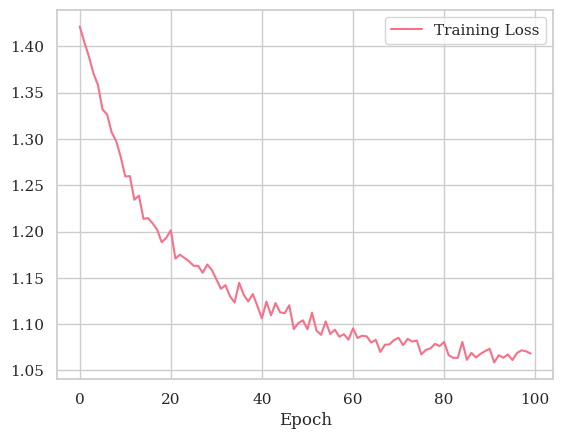

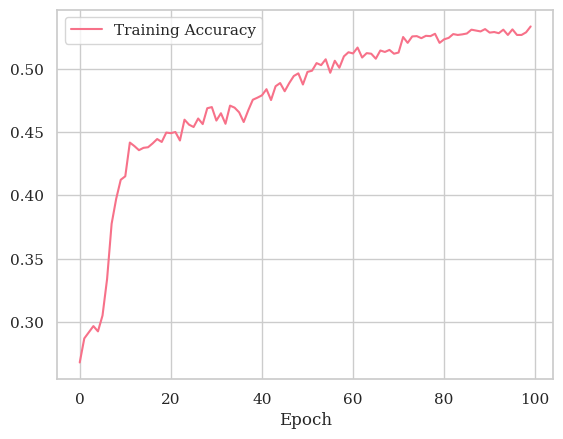

In [88]:
loss = []
acc = []
for a in eegitnet.history:
    loss.append(a['train_loss'])    
    acc.append(a['train_accuracy'])
plt.plot(loss, label='Training Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()
plt.plot(acc, label='Training Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [89]:
eegitnet.score(X_test, np.argmax(y_test, axis=1))

0.5196759259259259

In [90]:
test_metrics(eegitnet)

Accuracy:  0.5196759259259259
Precision:  0.5816412770175684
Recall:  0.5196759259259259
F1:  0.48390425810084425


In [91]:
from EEGModels import *

In [92]:
X_train.shape

(4320, 22, 1125)

In [48]:
fusion = EEGNet_fusion(nb_classes=4, Chans=22, Samples=1125,
                  dropoutRate=0.5, norm_rate=0.25, dropoutType='Dropout', cpu=True)
fusion.compile(optimizer=keras.optimizers.Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
fusion, fusion_results = CV_train(fusion, torch.tensor([X_train, X_train, X_train]), X_test, n_epochs=1)

c:\Users\Sam\miniconda3\envs\pytgpu\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


RuntimeError: [enforce fail at alloc_cpu.cpp:114] data. DefaultCPUAllocator: not enough memory: you tried to allocate 1478062080000 bytes.

In [49]:
temp = X_train

In [51]:
X_train = X_train.transpose(0,2,1)

In [52]:
X_train.shape

(4320, 1125, 22)

In [53]:
fusion = EEGNet_fusion_V2(nb_classes=4, Chans=22, Samples=1125,
                  dropoutRate=0.5, norm_rate=0.25, dropoutType='Dropout', cpu=True)
fusion.compile(optimizer=keras.optimizers.Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
fusion, fusion_results = CV_train(fusion, torch.tensor([X_train, X_train, X_train, X_train, X_train]), X_test, n_epochs=1)

c:\Users\Sam\miniconda3\envs\pytgpu\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


RuntimeError: [enforce fail at alloc_cpu.cpp:114] data. DefaultCPUAllocator: not enough memory: you tried to allocate 1478062080000 bytes.

In [ ]:
dcn_results

{'Accuracy': [0.6030092592592593, 0.6099537037037037],
 'F1': [0.5917885140072242, 0.5893488503579134],
 'Precision': [0.6067420271467648, 0.6183133726738377],
 'Recall': [0.6030092592592593, 0.6099537037037037]}

In [ ]:
test_pred = dcn.predict(np.expand_dims(X_test_noise_2,-1))
pred = (test_pred == test_pred.max(axis=1)[:,None]).astype(int)
print("Accuracy: ",accuracy_score(y_test.argmax(axis=1), pred.argmax(axis=1)))
print("F1: ",f1_score(y_test.argmax(axis=1), pred.argmax(axis=1), average='weighted'))
print("Precision: ",precision_score(y_test.argmax(axis=1), pred.argmax(axis=1),average='weighted'))
print("Recall: ",recall_score(y_test.argmax(axis=1), pred.argmax(axis=1),average='weighted'))
## SNR 15

27/27 [==============================] - 1s 36ms/step
Accuracy:  0.5891203703703703
F1:  0.5777006594328525
Precision:  0.6003727520351626
Recall:  0.5891203703703703


In [ ]:
test_pred = dcn.predict(np.expand_dims(X_test_noise,-1))
pred = (test_pred == test_pred.max(axis=1)[:,None]).astype(int)
print("Accuracy: ",accuracy_score(y_test.argmax(axis=1), pred.argmax(axis=1)))
print("F1: ",f1_score(y_test.argmax(axis=1), pred.argmax(axis=1), average='weighted'))
print("Precision: ",precision_score(y_test.argmax(axis=1), pred.argmax(axis=1),average='weighted'))
print("Recall: ",recall_score(y_test.argmax(axis=1), pred.argmax(axis=1),average='weighted'))
## SNR 8

27/27 [==============================] - 1s 38ms/step
Accuracy:  0.5590277777777778
F1:  0.547928522428475
Precision:  0.5876595148909717
Recall:  0.5590277777777778


In [ ]:
dcn.save('models/dcn.h5')

In [ ]:
dcn = keras.models.load_model('models/dcn.h5')